<a href="https://colab.research.google.com/github/WaithiraHawi/Derivative_Pricing/blob/main/Stochastic_Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heston Model**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [2]:
def SDE_vol(v0, kappa, theta, sigma, T, M, Ite, rand, row, cho_matrix):
    dt = T / M  # T = maturity, M = number of time steps
    v = np.zeros((M + 1, Ite), dtype=np.float)
    v[0] = v0
    sdt = np.sqrt(dt)  # Sqrt of dt
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        v[t] = np.maximum(
            0,
            v[t - 1]
            + kappa * (theta - v[t - 1]) * dt
            + np.sqrt(v[t - 1]) * sigma * ran[row] * sdt,
        )
    return v

In [3]:
def Heston_paths(S0, r, v, row, cho_matrix):
    S = np.zeros((M + 1, Ite), dtype=float)
    S[0] = S0
    sdt = np.sqrt(dt)
    for t in range(1, M + 1, 1):
        ran = np.dot(cho_matrix, rand[:, t])
        S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[row] * sdt)

    return S

In [4]:
def random_number_gen(M, Ite):
    rand = np.random.standard_normal((2, M + 1, Ite))
    return rand

In [5]:
v0 = 0.04
kappa_v = 2
sigma_v = 0.3
theta_v = 0.04
rho = -0.9

S0 = 100  # Current underlying asset price
r = 0.05  # Risk-free rate
M0 = 50  # Number of time steps in a year
T = 1  # Number of years
M = int(M0 * T)  # Total time steps
Ite = 10000  # Number of simulations
dt = T / M  # Length of time step

In [6]:
# Generating random numbers from standard normal
rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2), dtype=np.float)
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [7]:
# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
S = Heston_paths(S0, r, V, 0, cho_matrix)

NameError: name 'cho_matrix' is not defined

NameError: name 'S' is not defined

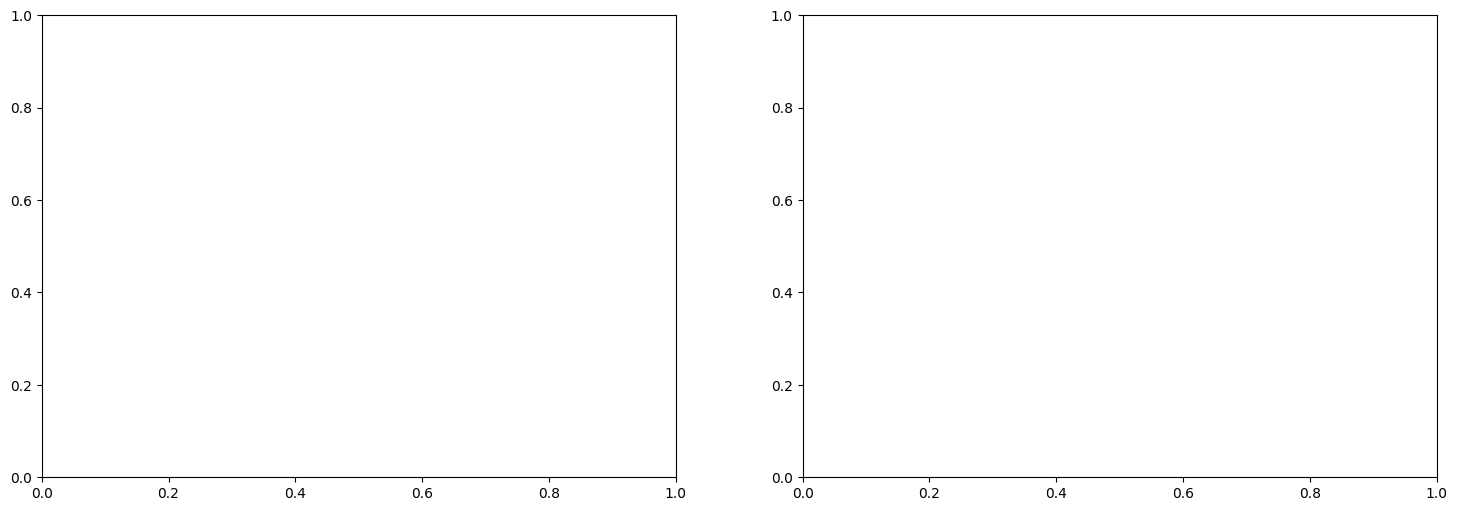

In [8]:
def plot_paths(n):
    fig = plt.figure(figsize=(18, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.plot(range(len(S)), S[:, :n])
    ax1.grid()
    ax1.set_title("Heston Price paths")
    ax1.set_ylabel("Price")
    ax1.set_xlabel("Timestep")

    ax2.plot(range(len(V)), V[:, :n])
    ax2.grid()
    ax2.set_title("Heston Volatility paths")
    ax2.set_ylabel("Volatility")
    ax2.set_xlabel("Timestep")


plot_paths(100)

**Heston Model statistical distribution**

In [9]:
# Obtaining degrees of freedom (do not worry a lot about this now)
c = 2 * kappa_v / ((1 - np.exp(-kappa_v * T)) * sigma_v**2)
df = 4 * kappa_v * theta_v / sigma_v**2
nc = 2 * c * v0 * np.exp(-kappa_v * T)


# Calculating returns and lengths of axis
log_R = np.log(S[-1, :] / S0)
x = np.linspace(log_R.min(), log_R.max(), 500)
y = np.linspace(0.00001, 0.1, 500)


# Plotting the different distributions
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Heston stochastic vol follows a CIR/Vasicek process
ax1.plot(
    y,
    ss.ncx2.pdf(y, df, nc, scale=1 / (2 * c)),
    color="green",
    label="non-central-chi-squared",
)
ax1.hist(V[-1, :], density=True, bins=100, facecolor="LightBlue", label="Heston Vol")
ax1.legend()
ax1.set_title("Heston Vol vs CIR")
ax1.set_xlabel("Volatility")

# Heston underlying returns do not follow a normal distribution
ax2.plot(
    x,
    ss.norm.pdf(x, log_R.mean(), log_R.std(ddof=0)),
    color="r",
    label="Normal density",
)
ax2.hist(
    log_R,
    density=True,
    bins=100,
    facecolor="LightBlue",
    label="Heston Underlying Log-returns",
)
ax2.legend()
ax2.set_title("Heston vs. Normally distributed returns")
ax2.set_xlabel("Log-returns")

NameError: name 'S' is not defined